1. Problem statement. 

Describe the dataset, analyze the target variable, and state your prediction goal.

In [47]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv('ds_salaries.csv')

data source: Data Science Job Salaries.

| Column             | Description                                                  |
| :----------------- | :----------------------------------------------------------- |
| work_year          | The year the salary was paid.                                |
| experience_level   | The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director |
| employment_type    | The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance |
| job_title          | The role worked in during the year.                          |
| salary             | The total gross salary amount paid.                          |
| salary_currency    | The currency of the salary paid as an ISO 4217 currency code. |
| salary*in*usd      | The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com). |
| employee_residence | Employee's primary country of residence in during the work year as an ISO 3166 country code. |
| remote_ratio       | The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%) |
| company_location   | The country of the employer's main office or contracting branch as an ISO 3166 country code. |
| company_size       | The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large) |

link: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

In [48]:
# 2.Basic data cleaning. 
# Drop unwanted features.  
df_dropedfeature = df.drop(['number','job_title', 'salary', 'salary_currency', 'employee_residence', 'company_location'], axis=1)
df_dropedfeature.columns


Index(['work_year', 'experience_level', 'employment_type', 'salary_in_usd',
       'remote_ratio', 'company_size'],
      dtype='object')

In [49]:
# Address missing values. 
print(df_dropedfeature.isnull().sum())

# this datas don't have any missing value.s

work_year           0
experience_level    0
employment_type     0
salary_in_usd       0
remote_ratio        0
company_size        0
dtype: int64


In [50]:
# Remove Duplicates.

# this datas don't have any duplicated low.

In [51]:
# Check if there are any inconsistent inputs for categorical variables. 

print(df_dropedfeature.shape)
print(df_dropedfeature.columns.tolist())
print(df_dropedfeature.dtypes)

(607, 6)
['work_year', 'experience_level', 'employment_type', 'salary_in_usd', 'remote_ratio', 'company_size']
work_year            int64
experience_level    object
employment_type     object
salary_in_usd        int64
remote_ratio         int64
company_size        object
dtype: object


In [52]:
df_rename = df_dropedfeature.replace({"EX": "SE"})

In [53]:
# Transform categorical variables into numeric.
df_rename = df_rename.replace({"EN": 0, "MI" :1, "SE":2})
df_rename = df_rename.replace({"PT":0, "CT":1, "FL":2, "FT":3})
df_rename = df_rename.replace({"S":0, "M":1, "L":2})
df_rename = df_rename.replace({2020:0, 2021:1, 2022:2})
df_rename = df_rename.replace({0:0, 50:1, 100:2})


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


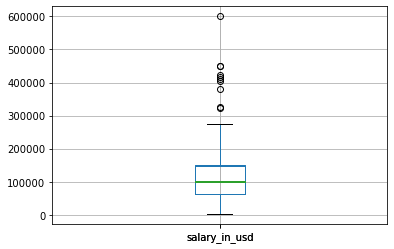

In [54]:
# Use boxplots or histogram to identify outliers for numeric variables and remove them
print(df_rename.boxplot(column = 'salary_in_usd'))

index1 = df_rename[df_rename ['salary_in_usd'] > 300000].index
df_rename.drop(index1, inplace=True)
print(df_rename.boxplot(column = 'salary_in_usd'))

In [55]:
print(df_rename)

     work_year  experience_level  employment_type  salary_in_usd  \
0            0                 1                3          79833   
1            0                 2                3         260000   
2            0                 2                3         109024   
3            0                 1                3          20000   
4            0                 2                3         150000   
..         ...               ...              ...            ...   
602          2                 2                3         154000   
603          2                 2                3         126000   
604          2                 2                3         129000   
605          2                 2                3         150000   
606          2                 1                3         200000   

     remote_ratio  company_size  
0               0             2  
1               0             0  
2               1             1  
3               0             0  
4            

3.Feature Engineering. 20 points

Feature selection. 

Use graphs, ANOVA test, Chi-squared test to reduce the dimension. 
Any variables with zero to little variance?  
Any features Irrelevant to the target variable? 
Any high-correlated Features?  
Feature scaling. 
Does this algorithm require normalized data or standardized data?
Are there any categorical variables need to be changed to dummy variables?


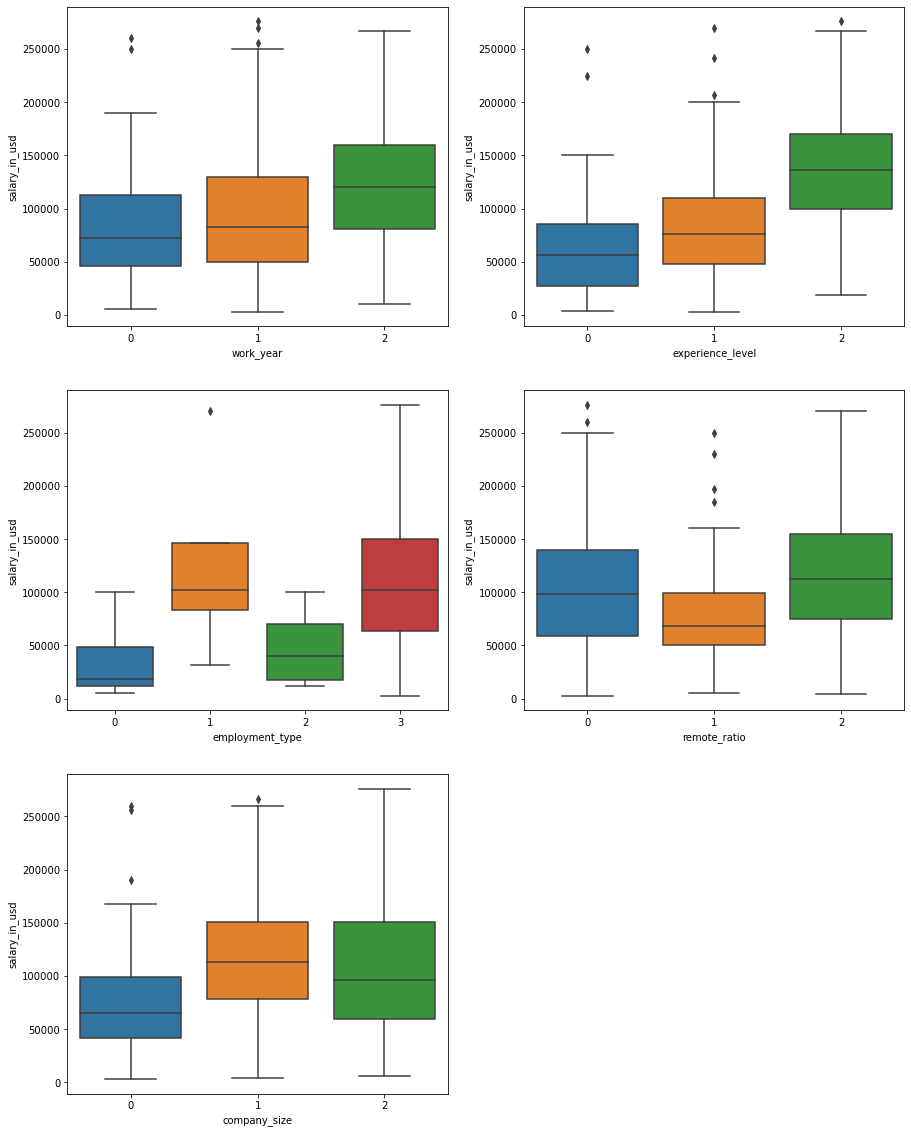

In [56]:
# Use boxplot and ANOVA test to check the relationship between the features and the target variable. 

# Numerical Features vs. Target - Box Plot
import seaborn as sns
num_list=['work_year', 'experience_level', 'employment_type', 'remote_ratio', 'company_size']
fig=plt.figure(figsize=(15, 20))

for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(3,2,i+1)
    sns.boxplot(x=column, y='salary_in_usd', data=df_rename)


In [57]:
# ANOVA
from sklearn.feature_selection import SelectKBest, f_classif
x = np.array(df_rename.loc[:, 'salary_in_usd']).reshape(-1,1)
num_list= ['work_year', 'experience_level', 'employment_type', 'remote_ratio', 'company_size']


for i in range(len(num_list)):
    column=num_list[i]
    y = df_rename.loc[:,column]
    fs = SelectKBest(score_func=f_classif, k='all')  # call the method
    FeaturesS = fs.fit(x, y)    # train the model
    np.set_printoptions(suppress = True)
    print(column+'FeaturesS.scores_')
    print(FeaturesS.scores_)    # print out the scores 
    print(column+'FeaturesS.pvalues_')
    print(FeaturesS.pvalues_)

work_yearFeaturesS.scores_
[24.49746365]
work_yearFeaturesS.pvalues_
[0.]
experience_levelFeaturesS.scores_
[118.26119602]
experience_levelFeaturesS.pvalues_
[0.]
employment_typeFeaturesS.scores_
[7.20165599]
employment_typeFeaturesS.pvalues_
[0.00009393]
remote_ratioFeaturesS.scores_
[18.41034165]
remote_ratioFeaturesS.pvalues_
[0.00000002]
company_sizeFeaturesS.scores_
[17.56820173]
company_sizeFeaturesS.pvalues_
[0.00000004]


In [58]:
# Transform the Categorical Variables to Dummy Variables

df_withdummies = pd.get_dummies(df_rename, columns=['work_year', 'experience_level', 'employment_type', 'remote_ratio', 'company_size'], drop_first=True)
df_withdummies.head()


,salary_in_usd,work_year_1,work_year_2,experience_level_1,experience_level_2,employment_type_1,employment_type_2,employment_type_3,remote_ratio_1,remote_ratio_2,company_size_1,company_size_2
0,79833,0,0,1,0,0,0,1,0,0,0,1
1,260000,0,0,0,1,0,0,1,0,0,0,0
2,109024,0,0,0,1,0,0,1,1,0,1,0
3,20000,0,0,1,0,0,0,1,0,0,0,0
4,150000,0,0,0,1,0,0,1,1,0,0,1


In [59]:
from sklearn.model_selection import train_test_split

x = df_withdummies.loc[:, df_withdummies.columns!='salary_in_usd']
y = df_withdummies['salary_in_usd']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

4. Build the prediction model.

Does this data need to be balanced?
Do you use train_test_split or cross validation to validate the result?
Which algorithm is appropriate for this problem?
Which metrics do you use to evaluate the prediction model?


In [85]:
#linear regression
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(x_train, y_train)
print(model2.score(x_test,y_test))

0.2740910091142642


In [77]:
#linear regression
from sklearn.linear_model import LinearRegression
y = np.array(df_rename.loc[:, 'salary_in_usd']).reshape(-1,1)
num_list= ['work_year', 'experience_level', 'employment_type', 'remote_ratio', 'company_size']


for i in range(len(num_list)):
    column=num_list[i]
    x = np.array(df_rename.loc[:,column]).reshape(-1,1)
    model2 = LinearRegression()
    model2.fit(x,y)
    print(model2.score(x,y))

0.07122665200585587
0.26870022481687694
0.02425069972881977
0.017963017302758066
0.016329680597736207


In [61]:
# Multiple linear regression. 
x = df_withdummies.loc[:,['work_year_1','work_year_2','experience_level_1','experience_level_2', 'employment_type_1', 'employment_type_2', 'employment_type_3', 'remote_ratio_1', 'remote_ratio_2', 'company_size_1', 'company_size_2']]
Y = df_withdummies['salary_in_usd']

from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(x, Y)

LinearRegression()

In [62]:
print(model1.score(x, Y))

print(model1.intercept_)
print(model1.coef_)

0.34089928537458136
23171.891014774475
[   456.91886803  12066.83119198  14264.92200391  64222.14961859
  55852.59535403 -16378.11722546  25192.23548696 -15084.62308011
   7156.84525649  10257.28637738  25083.68009676]


In [86]:
# Polynomial regression 2nd try

y = np.array(df_rename.loc[:, 'salary_in_usd']).reshape(-1,1)
num_list= ['work_year', 'experience_level', 'employment_type', 'remote_ratio', 'company_size']


from sklearn.preprocessing import PolynomialFeatures
for i in range(len(num_list)):
    column=num_list[i]
    x = np.array(df_rename.loc[:,column]).reshape(-1,1)
    polynomial_features = PolynomialFeatures(degree = 2)
    x_new = polynomial_features.fit_transform(x)

In [87]:
x_new

array([[1., 2., 4.],
       [1., 0., 0.],
       [1., 1., 1.],
       ...,
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 2., 4.]])

In [88]:
model3 = LinearRegression()
model3.fit(x_new,y)
print(model3.score(x_new,y))

0.055848625616337855


In [89]:
print(model3.intercept_)
print(model3.coef_)

[73506.24390244]
[[     0.          66250.8018472  -24518.82970026]]
